# Machine learning - Assignment 1 - Data preprocessing and manual introspection
____
**Author**: Kemal Cikota

**Course**: Machine learning
____

### Introduction

In this assignment, we were asked to perform preprocessing on a given data file Wage.csv by manipulating it by displaying it before and after removing certain columns of data, display statistic summaries and display some cool plots showing the relationships between some columns. In this assignment we also computed normality using the shapiro test, correlation using pearsons correlation test and in the end performed the ANOVA test. Each part will include an interpretation and short discussion on the results and how those results were collected and computed in python.

### Loading the data, minor processing and displays

before being able to perform any kind of computation, we need to import all necessary python libraries and load the wage.csv file.

In [56]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# load wage.csv
wage = pd.read_csv('wage.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

When the file is loaded, we can display the amount of features and their names. In this context, a feature is just a column in the wage.csv file. Note that in this output, numFeatures will return 12 and not 11 as in the example. This is because my python program includes the first empty column as its own row and i think that the example, written in R, does not. I did not feel the need to "fix" this as i don't see it as a big problem for the continuation of this assignment.

In [57]:
numFeatures = wage.shape[1]
print(numFeatures)

featureNames = wage.columns.tolist()
print(featureNames, end="\n\n")

12
['Unnamed: 0', 'year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'logwage', 'wage']



We can now delete the feature (column) 'logwage' and then displaying the amount of features and their names again using the pandas drop() function.

In [58]:
# Drop the logwage column column
wage = wage.drop(columns=["logwage"])
numFeatures = wage.shape[1]
featureNames = wage.columns.tolist()
print("After dropping logwage", end="\n\n")
print(numFeatures)
print(featureNames)


After dropping logwage

11
['Unnamed: 0', 'year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'wage']


As we can see, when printing numFeatures and featureNames again, we can see that the 'logwage' column is dropped. We cam now display the number of data points:

In [59]:
# Will print 3000
numDataPoints = wage.shape[0]
print(numDataPoints, end="\n\n")


3000



This printed 3000, which is the same as the example. We can now display all of the data. It is not as pretty as the one shown in the example but it still shows all of the rows which should be sufficient enough to get a good idea of what this data represents.

In [60]:
print(wage)

      Unnamed: 0  year  age            maritl      race        education  \
0         231655  2006   18  1. Never Married  1. White     1. < HS Grad   
1          86582  2004   24  1. Never Married  1. White  4. College Grad   
2         161300  2003   45        2. Married  1. White  3. Some College   
3         155159  2003   43        2. Married  3. Asian  4. College Grad   
4          11443  2005   50       4. Divorced  1. White       2. HS Grad   
...          ...   ...  ...               ...       ...              ...   
2995      376816  2008   44        2. Married  1. White  3. Some College   
2996      302281  2007   30        2. Married  1. White       2. HS Grad   
2997       10033  2005   27        2. Married  2. Black     1. < HS Grad   
2998       14375  2005   27  1. Never Married  1. White  3. Some College   
2999      453557  2009   55      5. Separated  1. White       2. HS Grad   

                  region        jobclass          health health_ins  \
0     2. Middle 

Now, we can print a statistic summary of the features using the pandas describe() function. I couldn't find a nice and quick one-liner to do this for me as in the example so i calculated some columns using the pandas describe() column but i calculated the occourences of the categories of the other columns using manual iteration.

In [61]:
print(wage.describe()) # this returns data from year, age and wage.

categorical_columns = ['maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']  # Add other columns as needed

# Count occurrences in each category for the specified columns
for col in categorical_columns:
    print("\n", wage[col].value_counts())


          Unnamed: 0         year          age         wage
count    3000.000000  3000.000000  3000.000000  3000.000000
mean   218883.373000  2005.791000    42.414667   111.703608
std    145654.072587     2.026167    11.542406    41.728595
min      7373.000000  2003.000000    18.000000    20.085537
25%     85622.250000  2004.000000    33.750000    85.383940
50%    228799.500000  2006.000000    42.000000   104.921507
75%    374759.500000  2008.000000    51.000000   128.680488
max    453870.000000  2009.000000    80.000000   318.342430

 maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64

 race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: count, dtype: int64

 education
2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: count, dtype: int64

 region
2. Middle Atlantic    

### Numerical features

Now that we have done some processing of the data and displayed it, we can do some computation on the data in order to test normality and correlation.

We start by just plotting the raw data showing the feature against the lable values. For this demonstration, i will follow the example, so i will plot and compare the data points between the age column and wage column using. The example showed a ggscatter() function from R where it looks like regression, confidence interval and the correlation coefficient can be plotted all at once. I don't know of a function that can take all of those arguments at once so i will do it in a pythonic way by defining the variables sequentaly.

Pearson Correlation Coefficient: 0.20, P-value: 2.90e-27


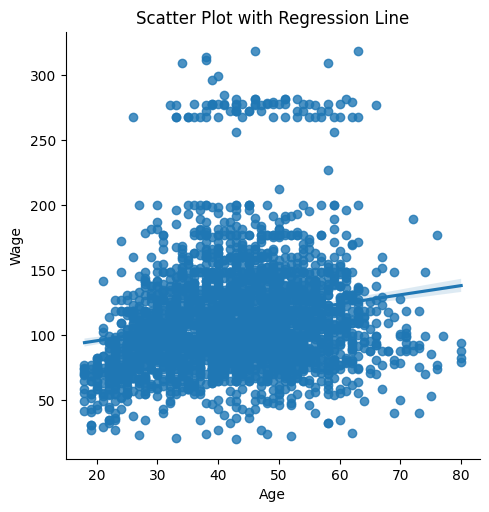

In [62]:
# Step 1 (plots)

corCoef, pValue = stats.pearsonr(wage['wage'], wage['age'])

print(f"Pearson Correlation Coefficient: {corCoef:.2f}, P-value: {pValue:.2e}")

sns.lmplot(data=wage, x='age', y='wage', ci=95)

# Add labels to the plot
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title(f"Scatter Plot with Regression Line")
plt.show() # Remember to make the window bigger to see the plot


Except for the color, this looks similar to what the example demonstrated, so we can move on and then also test the normality of the feature and lable values.

Shapiro-Wilk Test for 'age': Test Statistic = 0.9911, P-value = 0.0000
Shapiro-Wilk Test for 'wage': Test Statistic = 0.8796, P-value = 0.0000


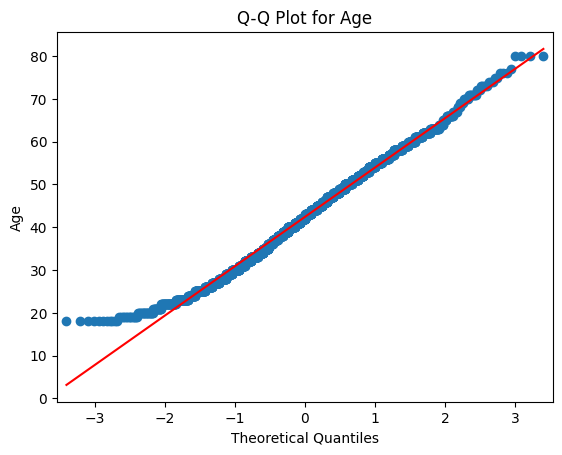

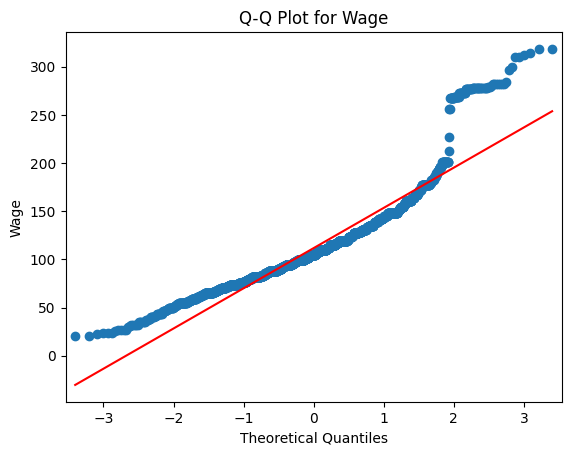

In [63]:
# Step 2 (normality, shapiro, QQ plot): 

shapiroAge, pAge = stats.shapiro(wage['age'])
print(f"Shapiro-Wilk Test for 'age': Test Statistic = {shapiroAge:.4f}, P-value = {pAge:.4f}")

shapiroWage, pWage = stats.shapiro(wage['wage'])
print(f"Shapiro-Wilk Test for 'wage': Test Statistic = {shapiroWage:.4f}, P-value = {pWage:.4f}")

# Q-Q plot for "age"
sm.qqplot(wage['age'], line='s')
plt.title("Q-Q Plot for Age")
plt.ylabel("Age")
plt.show()

# Q-Q plot for "wage"
sm.qqplot(wage['wage'], line='s')
plt.title("Q-Q Plot for Wage")
plt.ylabel("Wage")
plt.show()


This also looks similar to what was demonstrated in the example, so we can move on and perform the pearson correlation test by computing the pearson correlation coefficient.

In [64]:
# Step 3 (pearsson correlation test):

# This is the exact same code as in step 1
corCoef, pValue = stats.pearsonr(wage['wage'], wage['age'])

print(f"Pearson Correlation Coefficient: {corCoef:.2f}, P-value: {pValue:.2e}")

Pearson Correlation Coefficient: 0.20, P-value: 2.90e-27


### interpretation of results (Numerical features)

The first plot was a simple scatterplot showing the relation between wage and age, a regression line going through the graph and a confidence interval. Because the slope of the regression line is positive, meaning, the regression line goes "up", we can see that there is an indicator that as age increases, the wage increases. however, when performing the correlation test by calculating the pearson correlation coefficient, we only get a result of 0.2. From statistics, we know that pearsons correlation coefficients only exist in the range [-1, 1] where 0 indicates no correlation. So getting a 0.2 only shows a low correlation between ages and wages. This tells us that age alone isn't a good predictor of wages and there could be other factors in our data that could influence wages such as education, region, jobclass and year.

One interesting thing is the result from the normality test is that the dots line upp well on the red line for the QQ plot for age but for wage it deviates more from that red line. From theory, we know that a normality test tests whether or not the distribution of theese variables follow a normal distribution or not. The leading indicator is if this the blue dots stick close to the red line or not. Since the dots stray away from the red line on the wage QQ plot, we can see that the wage data is less normally distributed then the age data. This is particularily important because the tests like linear regression and pearson correlation assume normality so perhaps we could find other, more suitable test to test the relationship between the age and wage.

### Non numerical features (ANOVA)

In this part of the assignment, we use ANOVA to study the differences between the means of the label values for groups of data points with the same feature value.

We do this by first, listing the possible feature values.

In [65]:
# list possible feature values

# This is the same as levels(wage$education) in R
wage['education'] = wage['education'].astype('category')

levels = wage['education'].cat.categories
print("Levels:", levels.tolist())


Levels: ['1. < HS Grad', '2. HS Grad', '3. Some College', '4. College Grad', '5. Advanced Degree']


As we can see, we got all of the categories for the categories from the education column, which is the same as the example. 

Next, we can create a boxplot that plots the label values for each group of data points with the same feature value:

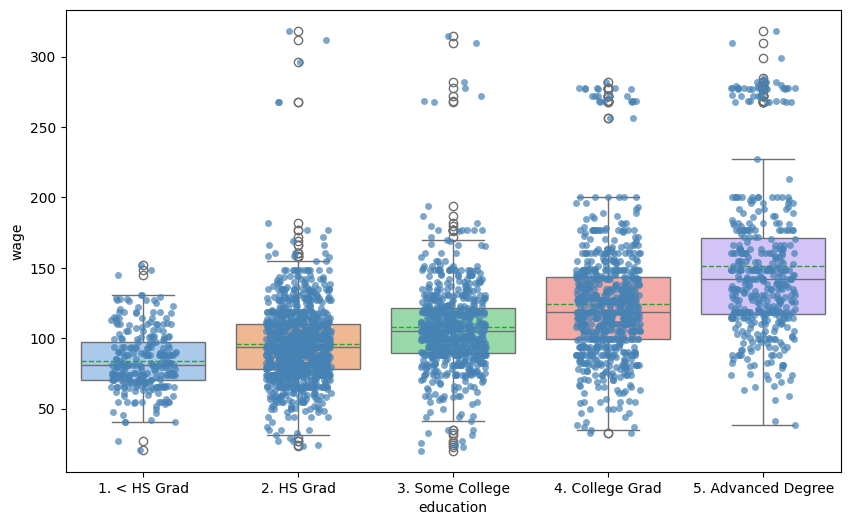

In [66]:
# Step 4.2 (boxplot):

plt.figure(figsize=(10, 6))
sns.boxplot(data=wage, x='education', y='wage', hue='education', palette="pastel", showmeans=True, meanline=True)
sns.stripplot(data=wage, x='education', y='wage', color='steelblue', jitter=0.21, size=5, alpha=0.7)

# Show the plot
plt.show()

We can now perform the ANOVA test and generate the ANOVA table. The only thing that is worth mentioning in the code here is taht i have to compute mean squares manually because i couldn't find the exact python equivalent to what was demonstrated in the example. This is however a simple task as we only have to take the ratio between the sum squares and the dF column.

In [67]:
# Step 4.3 (ANOVA):

# Perform one-way ANOVA
anova_model = sm.formula.ols('wage ~ C(education)', data=wage).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# have to compute mean squares manually
anova_table['mean_sq'] = anova_table['sum_sq'] / anova_table['df']

anova_table = anova_table[['df', 'sum_sq', 'mean_sq', 'F', 'PR(>F)']]

# Display the ANOVA table
print(anova_table)

                  df        sum_sq        mean_sq           F         PR(>F)
C(education)     4.0  1.226364e+06  306591.121218  229.805921  2.915932e-172
Residual      2995.0  3.995721e+06    1334.130646         NaN            NaN


### Interpretaion of non-numerical features.

From the boxplot, we can generally see that a higher education indicates a higher wage because of the higher black lines going through each box gets higher. We can however also see that the higher educations, especially college degrees and advanced degrees have taller boxes which indicates that the variability of wages is higher. This probably means that people that have higher educations exist in a wider range of industries and jobs while the lower education people have jobs with more uniform wages. 

From the ANOVA test we can see that the Mean squares (mean_sq) for C(education) is significantly larger than the residual which indicates that the differences between education substantially contributes to explaining wage variablity.